In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# For Classification Problem target variable will be -Exited

In [5]:
## Divide the dataset into independent and dependent features

X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
## feature Engineering (Categorical features: Ohe)
geography = pd.get_dummies(X['Geography'],drop_first= True)
gender = pd.get_dummies(X['Gender'],drop_first= True)


In [8]:
X = X.drop(["Geography","Gender"],axis=1)

In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
X=pd.concat([X,geography,gender],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
#Splitting into the train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform (X_test)

In [14]:
X_train

array([[ 1.5152216 , -0.18180427, -1.05172678, ...,  1.73007358,
        -0.57031183,  0.90453403],
       [ 1.99393125, -0.75527625, -1.05172678, ..., -0.5780101 ,
        -0.57031183,  0.90453403],
       [ 2.08759183,  2.30324097,  1.01463074, ..., -0.5780101 ,
        -0.57031183,  0.90453403],
       ...,
       [ 0.3600744 ,  1.63419033,  1.01463074, ..., -0.5780101 ,
         1.75342671,  0.90453403],
       [ 1.54644179, -1.61548422,  1.01463074, ..., -0.5780101 ,
        -0.57031183,  0.90453403],
       [-1.69005172,  0.10493172,  0.3258449 , ..., -0.5780101 ,
         1.75342671, -1.1055416 ]])

In [15]:
X_train.shape

(7000, 11)

In [16]:
#Strating With ANN part---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [17]:
### Lets initialize the ANN
classifier=Sequential()

In [18]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [19]:
# adding the first hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))

In [20]:
##adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [21]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [22]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [23]:
import tensorflow
opt= tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [24]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


In [25]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights = False
)

In [26]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
700/700 [==============================] - 6s 3ms/step - loss: 0.4023 - accuracy: 0.8283 - val_loss: 0.4021 - val_accuracy: 0.8383
Epoch 2/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3575 - accuracy: 0.8543 - val_loss: 0.3740 - val_accuracy: 0.8477
Epoch 3/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3542 - accuracy: 0.8566 - val_loss: 0.3759 - val_accuracy: 0.8447
Epoch 4/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3482 - accuracy: 0.8579 - val_loss: 0.3716 - val_accuracy: 0.8427
Epoch 5/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3471 - accuracy: 0.8571 - val_loss: 0.3762 - val_accuracy: 0.8507
Epoch 6/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3464 - accuracy: 0.8584 - val_loss: 0.3672 - val_accuracy: 0.8510
Epoch 7/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3436 - accuracy: 0.8593 - val_loss: 0.3658 - val_accuracy: 0.8527

In [27]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

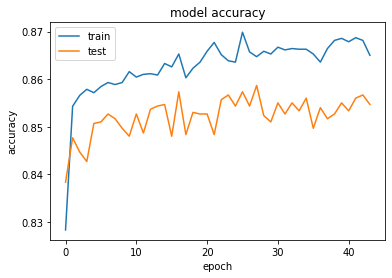

In [28]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

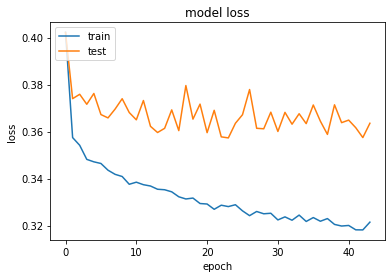

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [31]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[2317,   56],
       [ 380,  247]])

In [32]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8546666666666667

In [33]:
##get the weights
classifier.get_weights()


[array([[ 0.18263684, -0.61026514, -0.2677948 , -0.24650112, -0.3347725 ,
          1.3099446 , -0.23172143,  0.5081774 , -0.43233156, -0.12437559],
        [-4.0974207 ,  1.0363681 ,  0.2765307 , -1.3911068 , -0.42537442,
          0.7392625 ,  1.3844804 ,  2.8182185 ,  1.6599853 , -2.1371017 ],
        [ 0.2300819 , -0.25501904,  0.42546004,  0.85192955, -0.22777475,
         -0.35779604,  0.2156502 , -0.23712482,  1.5317855 ,  0.31711426],
        [ 1.0812057 ,  2.6381314 ,  3.3660553 ,  0.062217  ,  1.6930871 ,
          0.12830922, -0.60834706, -1.7218928 , -0.07490128, -4.604972  ],
        [ 0.29538712, -0.8591084 ,  1.5547929 , -0.82045364,  3.8160677 ,
          0.8073825 , -4.230259  , -1.0819143 , -1.3507107 ,  0.63272446],
        [-0.6011592 ,  0.20574056, -0.17752734, -0.87470585, -0.5974635 ,
          1.5902642 ,  0.05140235, -0.7387818 ,  1.6520302 ,  0.17493829],
        [-0.8562724 ,  3.1126256 , -2.1431792 ,  1.4294522 , -0.57817715,
          0.8265589 , -1.8026453

In [34]:
## Saving h5 file
classifier.save('model.h5')

In [35]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [36]:
classifier1.predict(X_test)

array([[0.00102277],
       [0.01197387],
       [0.02628855],
       ...,
       [0.9152819 ],
       [0.13511783],
       [0.1111359 ]], dtype=float32)